In [1]:
!pip install -q stability-sdk pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 78.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires grpcio>=1.71.2, but you have grpcio 1.63.2 which is incompatible.


In [2]:
import os, io
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

STABILITY_KEY = input("Enter Stability AI API key: ").strip()

os.environ["STABILITY_KEY"] = STABILITY_KEY

Enter Stability AI API key: sk-B2AL9aGvEtjjMRmqGykh4vZVdC9Vlgrc8kgX50QWWNXt5LY2


In [3]:
stability_api = client.StabilityInference(
    key=os.environ["STABILITY_KEY"],
    engine="stable-diffusion-xl-1024-v1-0",
    verbose=True,
)

INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got answer ff68ea17-d14a-406c-b86d-c78b102cf172 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS'] in 4.95s


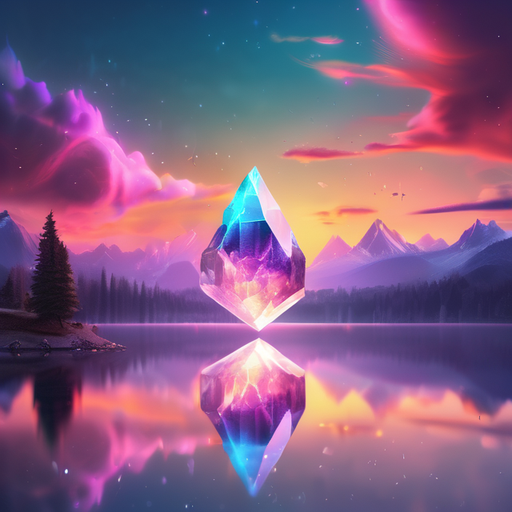

Saved: output_fantasy.png


In [4]:
prompt = (
    "Create a surreal fantasy landscape at sunset where a giant floating crystal "
    "hovers above a calm lake. The sky is filled with glowing clouds and neon reflections."
)

answers = stability_api.generate(
    prompt=prompt,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    samples=1
)

for resp in answers:
    for artifact in resp.artifacts:
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            img.save("output_fantasy.png")
            display(img)
            print("Saved: output_fantasy.png")

INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got answer fb4cfc0f-5688-4141-bbf6-82b0e36d9db6 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS'] in 3.25s


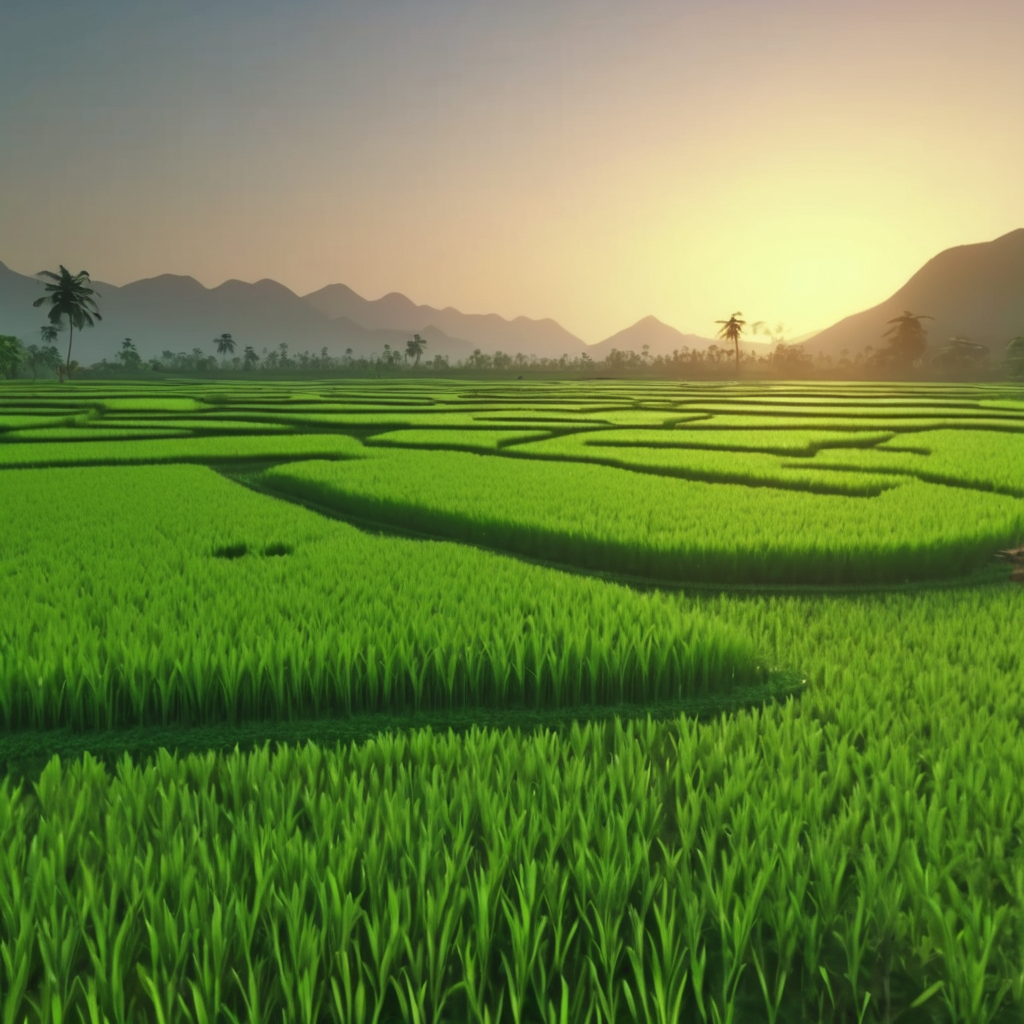

Saved: paddy_sunrise.png


In [5]:
prompt = "a lush green paddy field at sunrise, ultra realistic, 4k"

answers = stability_api.generate(
    prompt=prompt,
    width=1024,
    height=1024,
    steps=30,
    cfg_scale=8.0,
    samples=1
)

for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            print("Safety filter triggered. Try a different prompt.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            img.save("paddy_sunrise.png")
            display(img)
            print("Saved: paddy_sunrise.png")